# **Lab 2: Iterative methods**
**Christian Weigelt**

#***About the code*** 

In [211]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Christian Weigelt (weigelt@kth.se)

# This file is part of the course DD2363 DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Abstract**

This lab consisted of the implementation of a selection of iterative methods for solving linear equations, with varying properties.
Test code was written to verify function outputs with random, test cases.
In the introduction section, the functions are given a brief description, both of input/output, and what is to be tested.
In the method section, short definition of the functions are given, and their respective implementation and test function is presented.
In the results section, the output of the test cases is presented.

# **Set up environment**

In [212]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes

# **Introduction**

In this lab, the assignment was to implement 3 functions, with input and output as defined in the lab instructions, as well as write code tests to test output.
  
1. Function: Jacobi iteration for Ax=b

  Input: matrix A, vector b</br>
  Output: vector x

  Test: convergence of residual || Ax-b ||, || x-y || for manufactured/exact solution y 
</br>
2. Function: Gauss-Seidel iteration for Ax=b

  Input: matrix A, vector b</br>
  Output: vector x

  Test: convergence of residual || Ax-b ||, || x-y || for manufactured/exact solution y
</br>
3. Function: Newton's method for scalar nonlinear equation f(x)=0

  Input: scalar function f(x)</br>
  Output: real number x

  Test: convergence of residual |f(x)|, |x-y| for manufactured/exact solution y
</br>
4. Function: Newton's method for vector nonlinear equation f(x)=0

Input: vector function f(x)
Output: vector x

Test: convergence of residual || f(x) ||, || x-y || for manufactured/exact solution y
</br>

# **Method**

Here the code for the assignment is provided.

###Jacobi iteration for $Ax = b$
Function 1 is 'Jacobi iteration for $Ax = b$'

From chapter 7.7, we get the Jacobi iteration matrix as $M_J = -D^{-1}(A - D) = (I - D^{-1}A)$,
and the formula for iteratively calculating $x^{(k+1)}$ is:

 $x^{(k+1)} = (I - D^{-1}A)x^{k} + D^{-1}b $

 Where $c = D^{-1}b$ is constant, and we start with $x^{(0)} = c$.

 For testing we will use a diagonally dominant matrix $A$, which satisfies the convergence criterion, with $B$ being an approximate inverse of $A$.

In [213]:
def jacobi_iteration(A, b, tol):
  # Assume A is square (n*n) and b is a vector of length n
  I = np.identity(A.shape[0])
  d = np.diag(np.diag(A))
  # since d is a diagonal matrix, the inverse is simple each element e replaced by 1/e
  d_inv = np.linalg.inv(d) 
  c = np.dot(d_inv, b)
  # save x values to a vector for plotting, x_v[-1] is latest
  x_v = []
  x_v.append(c)
  while np.linalg.norm(np.dot(A, x_v[-1]) - b) > tol:
    x_v.append(np.dot((I - np.matmul(d_inv, A)), x_v[-1]) + c)
  return x_v

To test the above code, we can run the following test function:

In [214]:
def test_jacobi_iteration():
  print("Testing jacobi_iteration()")
  A = np.random.rand(10, 10)
  y = np.random.rand(10)

  # make a diagonally dominant for convergence
  for i in range(A.shape[0]):
    sum = np.sum(A[i, :])
    sum -= A[i, i]
    A[i, i] += sum

  b = np.dot(A, y)

  x_v = jacobi_iteration(A, b, 1e-10)
  x = x_v[-1]

  #test if |Ax - b| is close to 0
  assert np.isclose(np.linalg.norm(np.dot(A, x) - b), 0.) == True, "incorrect result from jacobi_iteration"

  #test if |x - y| is close to 0
  assert np.less_equal(np.linalg.norm(x - y), 1e-10) == True, "solution not close to manufactured solution"

Plot of convergence for Jacobi iteration:

Text(0, 0.5, 'norm(error)')

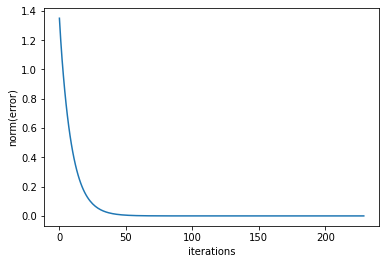

In [215]:
A = np.random.rand(10, 10)
y = np.random.rand(10)

for i in range(A.shape[0]):
  sum = np.sum(A[i, :])
  sum -= A[i, i]
  A[i, i] += sum

b = np.dot(A, y)

x_v = jacobi_iteration(A, b, 1e-10)
# calculate norm(error)
x_v = [np.linalg.norm(x - y) for x in x_v]

plt.plot(range(len(x_v)), x_v)
plt.xlabel("iterations")
plt.ylabel("norm(error)")

###Gauss-Seidel iteration for Ax=b

Function 2 is 'Gauss-Seidel iteration for Ax=b'

From chapter 7.7, we get the Gauss-Seidel iteration matrix as $M_GS = -L^{-1}(A - L) = (I - L^{-1}A)$,
and the formula for iteratively calculating $x^{(k+1)}$ is:

 $x^{(k+1)} = (I - L^{-1}A)x^{k} + L^{-1}b $

 Where $c = L^{-1}b$ is constant, and we start with $x^{(0)} = c$.

 For testing we will use a diagonally dominant matrix $A$, which satisfies the convergence criterion, with $B$ being an approximate inverse of $A$.

In [216]:
def gauss_seidel_iteration(A, b, tol):
  # Assume A is square (n*n) and b is a vector of length n
  I = np.identity(A.shape[0])
  L = np.zeros_like(A)
  for i in range(A.shape[0]):
    for j in range(A.shape[0]):
      if i >= j:
        L[i, j] = A[i, j]
  #since L is a lower triangular matrix, it is easily invertible by forward substitution
  L_inv = np.linalg.inv(L)
  c = np.dot(L_inv, b)
  # save x values to a vector for plotting, x_v[-1] is latest
  x_v = []
  x_v.append(c)
  while np.linalg.norm(np.dot(A, x_v[-1]) - b) > tol:
    x_v.append(np.dot((I - np.matmul(L_inv, A)), x_v[-1]) + c)
  return x_v

To test the above code, we can run the following test function:

In [217]:
def test_gauss_seidel_iteration():
  print("Testing gauss_seidel_iteration()")
  A = np.random.rand(10, 10)
  y = np.random.rand(10)

  # make a diagonally dominant for convergence
  for i in range(A.shape[0]):
    sum = np.sum(A[i, :])
    sum -= A[i, i]
    A[i, i] += sum

  b = np.dot(A, y)

  x_v = gauss_seidel_iteration(A, b, 1e-10)

  #test if |Ax - b| is close to 0
  assert np.isclose(np.linalg.norm(np.dot(A, x_v[-1]) - b), 0.) == True, "incorrect result from gauss_seidel_iteration"
  
  #test if |x - y| is close to 0
  assert np.isclose(np.linalg.norm(x_v[-1] - y), 0.) == True, "solution not close to manufactured solution"

Plot of convergence for Gauss-Seidel iteration:

Text(0, 0.5, 'norm(error)')

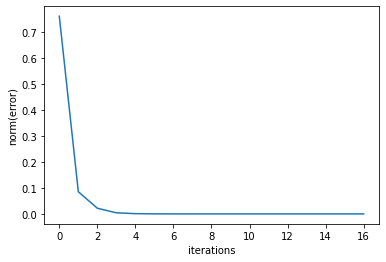

In [218]:
A = np.random.rand(10, 10)
y = np.random.rand(10)

for i in range(A.shape[0]):
  sum = np.sum(A[i, :])
  sum -= A[i, i]
  A[i, i] += sum

b = np.dot(A, y)

x_v = gauss_seidel_iteration(A, b, 1e-10)
# calculate norm(error)
x_v = [np.linalg.norm(x - y) for x in x_v]

plt.plot(range(len(x_v)), x_v)
plt.xlabel("iterations")
plt.ylabel("norm(error)")

###Newton's method for scalar nonlinear equation f(x)=0

Function 3 is 'Newton's method for scalar nonlinear equation f(x)=0'

The function finds a solution to the nonlinear equation $f(x) = 0$ by derivating the function and using a tangent line to the function to find a solution x that solves the equation.

The iteration formula is the following:
$x^{k + 1} = x^k - f(x^k)/f'(x^k)$

A polynomial function is used, by use of 'numpy.polynomial'.


In [219]:
def newton_scalar(f, tol):
  # Guess x0 = 0
  x = 0
  while np.abs(f(x)) > tol:
    df = np.polyder(f)
    x -= f(x)/df(x)
  return x

To test the above code, we can run the following test function:

In [360]:
def test_newton_scalar():
  print("Testing newton_scalar()")
  size = 4
  coeffs = np.random.randint(10, size=size)
  f = np.poly1d(coeffs, True) # produces a polynomial with coeffs as roots
  x = newton_scalar(f, 1e-10)

  # Test if f(x) is very close to zero, i.e. root found
  assert np.isclose(f(x), 0), "No root f(x)=0 found"

  # Check if x is close to a given root to the polynomial function
  match = False
  for c in coeffs:
    if np.isclose(c, x):
      print(f"|y - x| = {np.linalg.norm(c - x)}")
      match = True
  assert match == True, "x not one of f's given roots?"

In [365]:
test_newton_scalar()

Testing newton_scalar()
|y - x| = 1.341149413747189e-13


Note that there may be coefficients $c_j, c_k$ where $c_j = c_k$, so 

###Newton's method for vector nonlinear equation f(x)=0
Function 4 is 'Newton's method for vector nonlinear equation f(x)=0'

The function finds a solution to the nonlinear equation $f(x) = 0$ in $R^n$. 
It is analogous to the scalar nonlinear equation, but where the inverse of the derivative is replaced by the inverse of the Jacobian matrix $(f'(x^{(k)}))^{-1}$ 

The iteration formula is the following:
$x^{k + 1} = x^k - (f'(x^{(k)}))^{-1} f(x^k)$

A 'np.array'-valued function is used to represent the vector equation.


Calculate Jacobian using finite difference method:

In [313]:
def jac_approx(f, x, h):
  n = x.size
  diff = h * np.identity(x.size)
  J = np.zeros((2, 2))
  for i in range(n):
      J[i, :] = (f(x + diff[i, :]) - f(x))/h
  return J

Newton method:

In [326]:
def newton_vector(f, x, tol):
  # initial guess x
  while np.linalg.norm(f(x)) > tol:
    df = jac_approx(f, x, 1e-8)
    x = x - np.linalg.solve(df, f(x))
  return x

To test the above code, we can run the following test function:

In [367]:
def test_newton_vector():
  print("Testing newton_vector()")
  
  # manufactured vector equation, solutions: (0, 0), (3/2 , -5/3)
  def f(x):
    return np.array([x[0]*(3*x[1] + 5), x[1]*(3 - 2*x[0])])

  # should find a solution close to (0, 0)
  y1 = np.array([0, 0])
  x0 = np.array([-1, 1])
  x1 = newton_vector(f, x0, 1e-10)
  # norm of f(x1)
  norm_f_x1 = np.linalg.norm(f(x1))
  print(f"||f(x1)|| = {norm_f_x1}")
  assert np.isclose(norm_f_x1, 0.) == True, f"||f(x1)|| not small enough"
  # norm of y - x
  norm_y1_x1 = np.linalg.norm(y1 - x1)
  print(f"||y1 - x1|| = {norm_y1_x1}")
  assert np.isclose(norm_y1_x1, 0.) == True, f"||y1 - x1|| not small enough"

  # should find a solution close to (3/2, -5/3)
  y2 = np.array([3/2, -5/3])
  x0 = np.array([1, -1])
  x2 = newton_vector(f, x0, 1e-10)
  # norm of f(x2)
  norm_f_x2 = np.linalg.norm(f(x2))
  print(f"||f(x2)|| = {norm_f_x2}")
  assert np.isclose(norm_f_x2, 0.) == True, f"||f(x2)|| not small enough"
  # norm of y - x
  norm_y2_x2 = np.linalg.norm(y2 - x2)
  print(f"||y2 - x2|| = {norm_y2_x2}")
  assert np.isclose(norm_y2_x2, 0.) == True, f"||y2 - x2|| not small enough"


In [371]:
test_newton_vector()

Testing newton_vector()
||f(x1)|| = 2.197595230181428e-19
||y1 - x1|| = 4.395190460362856e-20
||f(x2)|| = 7.329614646376973e-11
||y2 - x2|| = 1.62881267694005e-11


###Testing
Then to perform all the tests, we can run the following code:

In [370]:
def run_all_tests():
  test_jacobi_iteration()
  test_gauss_seidel_iteration()
  test_newton_scalar()
  test_newton_vector()
  print("All tests OK")

if __name__ == '__main__':
  run_all_tests()

Testing jacobi_iteration()
Testing gauss_seidel_iteration()
Testing newton_scalar()
|y - x| = 2.220446049250313e-16
Testing newton_vector()
||f(x1)|| = 2.197595230181428e-19
||y1 - x1|| = 4.395190460362856e-20
||f(x2)|| = 7.329614646376973e-11
||y2 - x2|| = 1.62881267694005e-11
All tests OK


# **Results**

Running the test cases here in google colab, after importing required libraries, defining all functions, etc., generates the following output:
```
Testing jacobi_iteration()
Testing gauss_seidel_iteration()
Testing newton_scalar()
|y - x| = 2.220446049250313e-16
Testing newton_vector()
||f(x1)|| = 2.197595230181428e-19
||y1 - x1|| = 4.395190460362856e-20
||f(x2)|| = 7.329614646376973e-11
||y2 - x2|| = 1.62881267694005e-11
All tests OK
```
From which we can see that all test cases were passed, with printed residuals being very close to zero.

# **Discussion**

The Jacobi iteration method moves at a steady pace at first, but severely slows down when approaching the solution. The Gauss-Seidel iteration method is much faster, converging to the solution at a much faster rate.
For scalar nonlinear equations, formulating the equation in python was quite easy, as all that was needed was a polynomial, for which 'np.polynomial' was easy to use.
Solving the extra assignment was a challenge, especially in how to represent the linear equation properly. I decided to use an np.array-valued function to do it, which turned out well. I expect there to be an elegant way to do it using 'np.polynomial', but I just couldn't figure out how to do it using that.